# Implementation of KRR, Logistic Regression and SVM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

C:\Users\jagpa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jagpa\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data=pd.read_csv('C:/Users/jagpa/ML/ML_Exam/classsification/classification_data.tsv',delimiter='\t')

# Summary Statistics of data

In [3]:
data.describe()

,Red,Green,Blue,Class
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


In [4]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
Red      245057 non-null int64
Green    245057 non-null int64
Blue     245057 non-null int64
Class    245057 non-null int64
dtypes: int64(4)
memory usage: 7.5 MB


In [5]:
data.head()

,Red,Green,Blue,Class
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


**Separating data into Features (X) and Target(y).**

In [6]:
X = data.drop(['Class'],axis=1).values
y = data.Class.values

In [7]:
X

array([[ 74,  85, 123],
       [ 73,  84, 122],
       [ 72,  83, 121],
       ..., 
       [163, 162, 112],
       [163, 162, 112],
       [255, 255, 255]], dtype=int64)

In [8]:
y

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

# Plotting all the attributes

Principal Component Analysis (PCA) does the analysis of data to identify patterns and finding patterns to reduce the dimensions of thedataset with minimal loss of information. Here I'm using PCA to covert attributes into 2-dimensions and plot all of them.

**Scatter Plot**

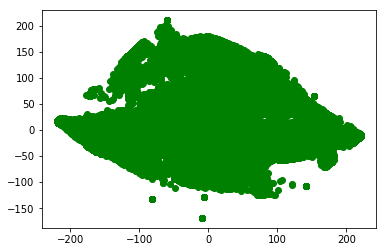

In [9]:
cmp_pca = PCA(n_components=2) # 2 PCA components;
arr_pca = cmp_pca.fit_transform(X)
plt.scatter(arr_pca[:,0],arr_pca[:,1],c='G')
plt.show()

<function matplotlib.pyplot.show>

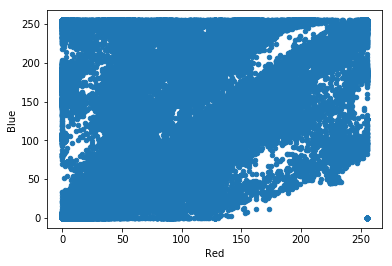

In [10]:
sp = pd.concat([data['Red'], data['Blue']], axis =1)
sp.plot.scatter(x = 'Red', y = 'Blue')
plt.show

**Histogram**

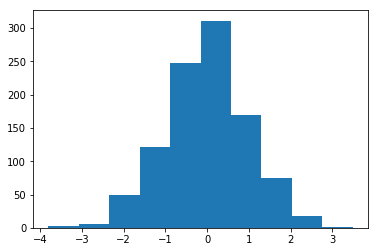

In [11]:
from numpy.random import normal
arr_pca = normal(size=1000)
plt.hist(arr_pca)
plt.show()

# Correlation Matrix

correlation values between attribute columns are shown belown in Correlation Matrix.

In [12]:
data2 = data.drop('Class',axis=1)
cor_matrix = data2.corr()
cor_matrix

,Red,Green,Blue
Red,1.000000,0.855250,0.496376
Green,0.855250,1.000000,0.660098
Blue,0.496376,0.660098,1.000000


# Train Test Split

I'm splitting dataset into training and testing set by 80% i.e. 80% train set and 20% test set. Training set contains a known output and model learns on trained data in order to be generalized to other data.

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=20)

In [14]:
print('Shape of training data')
print(X_train.shape)
print('Shape of testing data')
print(X_test.shape)

Shape of training data
(196045, 3)
Shape of testing data
(49012, 3)


# Logistic Regression Model

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. Logistic regression builds on the basic formula for linear regression (a), simplified to (b), which produces a predicted target value for an input vector.

(a) y(x) = w0+ w1Φ(x1) + ... + wnΦ(xn)

(b) y(x) = w'(x)

In [15]:
LogisticRegressionModel = linear_model.LogisticRegression()

In [16]:
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
LogisticRegScore = LogisticRegressionModel.score(X_test,y_test)

In [18]:
print(LogisticRegScore)

0.918917816045


In [19]:
logistic_model_predictions = LogisticRegressionModel.predict(X_test)

In [20]:
logistic_model_predictions

array([2, 2, 1, ..., 2, 1, 2], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
logistic_error = confusion_matrix(y_true=y_test, y_pred=logistic_model_predictions, labels=None, sample_weight=None)

In [23]:
print('The Error of the Logistic Regression model is: ')
print(logistic_error)

The Error of the Logistic Regression model is: 
[[ 8395  1807]
 [ 2167 36643]]


# Kernalized Ridge Regression

We use plain Ridge Regression to minimize L2-regularized least-square error. Kernelized Ridge Regression has the same objective, but use a substitution to rewrite the function in terms of ΦΦᵀ, so that predictions can be made without needing to compute ΦΦᵀ directly. A few choices for the kernel are

(a)Linear / Identity Kernel : K(X,X’) = Xᵀ X

(b)Polynomial Kernel : K(X,X’) = (γ Xᵀ X + r)M 

(c)RBF / Gaussian Kernel : K(X,X’) = exp [ - (|| X - X’ ||2) / 2σ2 ]

**Cross-Validation** : It is a model validation technique for evaluating how the outcomes of a statistical analysis will generalize to an independent data set. Mainly used in backgrounds where the objective is forecast and one wants to estimate how accurately a model will accomplish in practice. The goal of cross-validation is to term a data set to test the model in the training phase (i.e. validation data set) in order to limit problems like overfitting, and get an insight on how the model will generalize to an independent data set.

**GridSearchCV** : Scikit-learn’s GridSearchCV performs k-fold cross validation and searches for a best parameters across a set of parameters. Here I'm using 5-fold cross validation for hyperparameter tuning.

**Dataset is very large and gives memory space error so I considers 10,000 samples and implemented kernel on it.**

In [24]:
data2 = pd.read_csv('C:/Users/jagpa/ML/ML_Exam/classsification/classification_data.tsv',delimiter='\t')

In [25]:
data2 = data2.sample(n=2500)

In [26]:
data2.describe()

,Red,Green,Blue,Class
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,126.922000,134.634400,126.127600,1.790400
std,61.608861,59.112483,71.855348,0.407105
min,0.000000,0.000000,0.000000,1.000000
25%,72.750000,91.000000,84.000000,2.000000
50%,142.000000,155.000000,129.000000,2.000000
75%,177.000000,178.000000,166.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


In [27]:
data2.head()

,Red,Green,Blue,Class
105042,173,172,122,2
131054,108,110,64,2
15008,143,180,242,1
207197,94,95,53,2
44737,122,155,224,1


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 105042 to 40670
Data columns (total 4 columns):
Red      2500 non-null int64
Green    2500 non-null int64
Blue     2500 non-null int64
Class    2500 non-null int64
dtypes: int64(4)
memory usage: 97.7 KB


In [29]:
X2 = data2.drop('Class',axis=1).values
y2 = data2['Class'].values

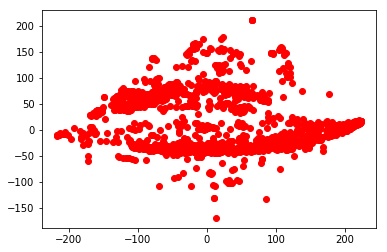

In [30]:
cmp_pca2 = PCA(n_components=2) # 2 PCA components;
arr_pca2 = cmp_pca2.fit_transform(X2)
plt.scatter(arr_pca2[:,0],arr_pca2[:,1],c='R')
plt.show()

In [31]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X2,y2,test_size=0.9, random_state=1)
X3_train,X3_test,y3_train,y3_test=train_test_split(X4_train,y4_train,test_size=0.9, random_state=1)
X2_train,X2_test,y2_train,y2_test=train_test_split(X3_train,y3_train,test_size=0.2, random_state=1)

# Kernalized Ridge Regression

**Linear Kernel**

In [32]:
KRR_linear=KernelRidge(kernel='linear')
KRR_linear.fit(X2_train,y2_train)

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

In [33]:
y_pred=KRR_linear.predict(X2_test)

In [34]:
print('Score for Linear Kernel :',r2_score(y2_test,y_pred))

Score for Linear Kernel : -2.59022127699


**Polynomial Kernel**

In [35]:
KRR_polynomial= GridSearchCV(KernelRidge(kernel="polynomial", alpha=1, gamma=1, coef0=1), cv=5, param_grid={"degree":[2,3]})
KRR_polynomial.fit(X2_train,y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=1, kernel='polynomial',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1, param_grid={'degree': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [36]:
y_pred=KRR_polynomial.predict(X2_test)

In [37]:
print('Score for poly : ',KRR_polynomial.best_score_)

Score for poly :  -1.7634713863325957


In [38]:
print('Best parameters : ',KRR_polynomial.best_params_)

Best parameters :  {'degree': 2}


**Gaussian Kernel**

In [39]:
KRR_gaussian= GridSearchCV(KernelRidge(kernel="rbf"), cv=5, param_grid={"gamma":[0.1, 0.5, 1, 2, 4]})
KRR_gaussian.fit(X2_train,y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='rbf',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.1, 0.5, 1, 2, 4]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [40]:
y_pred=KRR_gaussian.predict(X2_test)

In [41]:
print('Score for rbf : ',KRR_gaussian.best_score_)

Score for rbf :  -7.11018072291413


In [42]:
print('Best parameters : ',KRR_gaussian.best_params_)

Best parameters :  {'gamma': 0.1}


# SVM

**Hard Margin SVM using rbf kernel**

In [43]:
from sklearn import svm
hard_svm1 = svm.SVC(C =1e10,kernel="rbf",gamma =1.5,shrinking=False,cache_size=3000)
hard_svm1.fit(X2_train,y2_train)

SVC(C=10000000000.0, cache_size=3000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)

In [44]:
y_pred= hard_svm1.predict(X2_test)
print('y prediction :',y_pred)
print('Score on test set :',hard_svm1.score(X2_test,y2_test))
print('Score on train set :',hard_svm1.score(X2_train,y2_train))

y prediction : [2 2 2 2 2]
Score on test set : 0.8
Score on train set : 1.0


In [45]:
svm_error = confusion_matrix(y_true=y2_test, y_pred=y_pred, labels=None, sample_weight=None)
print('The Error is: ')
print(svm_error)

The Error is: 
[[0 1]
 [0 4]]


**Hard Margin SVM using linear kernel**

In [46]:
hard_svm2 = svm.SVC(C =100000,kernel="linear",gamma =1,shrinking=False,cache_size=3000)
hard_svm2.fit(X2_train,y2_train)

SVC(C=100000, cache_size=3000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)

In [47]:
y_pred= hard_svm2.predict(X2_test)
print('y prediction :',y_pred)
print('Score on test set :',hard_svm2.score(X2_test,y2_test))
print('Score on train set :',hard_svm2.score(X2_train,y2_train))

y prediction : [2 2 2 1 2]
Score on test set : 1.0
Score on train set : 1.0


In [48]:
svm_error2 = confusion_matrix(y_true=y2_test, y_pred=y_pred, labels=None, sample_weight=None)
print('The Error of linear kernel is: ')
print(svm_error2)

The Error of linear kernel is: 
[[1 0]
 [0 4]]


**Hard Margin SVM using poly kernel**

In [49]:
hard_svm3 = svm.SVC(C =10000,kernel="poly",gamma =1,shrinking=False,cache_size=3000)
hard_svm3.fit(X2_train,y2_train)

SVC(C=10000, cache_size=3000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)

In [50]:
y_pred= hard_svm3.predict(X2_test)
print('y prediction :',y_pred)
print('Score on test set :',hard_svm3.score(X2_test,y2_test))
print('Score on train set :',hard_svm3.score(X2_train,y2_train))

y prediction : [2 2 2 1 2]
Score on test set : 1.0
Score on train set : 1.0


In [51]:
svm_error3 = confusion_matrix(y_true=y2_test, y_pred=y_pred, labels=None, sample_weight=None)
print('The Error of polynomial kernel is: ')
print(svm_error3)

The Error of polynomial kernel is: 
[[1 0]
 [0 4]]


**Soft Margin SVM**

In [52]:
coef0 = [0.1, 0.5, 1, 2, 5]
for i in range(4) :
    soft_svm = svm.SVC(C = 1,coef0=coef0[i])
    soft_svm.fit(X2_train,y2_train)
    y_pred= soft_svm.predict(X2_test)
    print('y prediction :',y_pred)
    print('score on test data for', coef0[i],':',soft_svm.score(X2_test,y2_test))
    print('score on train data for', coef0[i],':',soft_svm.score(X2_train,y2_train))
    conf_mx = confusion_matrix(y2_test,y_pred)
    print('confusion_mx_error for',coef0[i])
    print(conf_mx)
    print('\n')

y prediction : [2 2 2 2 2]
score on test data for 0.1 : 0.8
score on train data for 0.1 : 1.0
confusion_mx_error for 0.1
[[0 1]
 [0 4]]


y prediction : [2 2 2 2 2]
score on test data for 0.5 : 0.8
score on train data for 0.5 : 1.0
confusion_mx_error for 0.5
[[0 1]
 [0 4]]


y prediction : [2 2 2 2 2]
score on test data for 1 : 0.8
score on train data for 1 : 1.0
confusion_mx_error for 1
[[0 1]
 [0 4]]


y prediction : [2 2 2 2 2]
score on test data for 2 : 0.8
score on train data for 2 : 1.0
confusion_mx_error for 2
[[0 1]
 [0 4]]




**Soft Margin SVM using cross validation(Linear)**

In [53]:
soft_svm2_lnr = svm.SVC()
soft_svm2_lnr = GridSearchCV(estimator=soft_svm2_lnr, param_grid={'kernel': ['linear'], 'C': [1, 100, 100], 'max_iter':[5000]}, cv=5, refit=True, scoring='accuracy')
soft_svm2_lnr.fit(X2_train, y2_train)
y_pred2 = soft_svm2_lnr.predict(X2_test)
y_pred2
print('score for linear :',soft_svm2_lnr.best_score_)
print('best parameters :',soft_svm2_lnr.best_params_)
conf_mx = confusion_matrix(y2_test,y_pred)
print('confusion_mx_error:\n',conf_mx)

score for linear : 1.0
best parameters : {'C': 1, 'kernel': 'linear', 'max_iter': 5000}
confusion_mx_error:
 [[0 1]
 [0 4]]


**Soft Margin SVM using cross validation(Poly)**

In [54]:
soft_svm2_poly = svm.SVC()
soft_svm2_poly = GridSearchCV(estimator=soft_svm2_poly, param_grid={'kernel': ['poly'], 'C': [1, 100, 100],  'gamma': [0.1, 0.5, 1, 2, 5], 'max_iter':[5000]}, cv=5, refit=True, scoring='accuracy')
soft_svm2_poly.fit(X2_train, y2_train)
y_pred2 = soft_svm2_poly.predict(X2_test)
y_pred2
print('score for polynomial :',soft_svm2_poly.best_score_)
print('best parameters :',soft_svm2_poly.best_params_)
conf_mx = confusion_matrix(y2_test,y_pred)
print('confusion_mx_error:\n',conf_mx)

score for polynomial : 1.0
best parameters : {'C': 1, 'gamma': 0.1, 'kernel': 'poly', 'max_iter': 5000}
confusion_mx_error:
 [[0 1]
 [0 4]]


**Soft Margin SVM using cross validation(RBF)**

In [55]:
soft_svm2_rbf = svm.SVC()
soft_svm2_rbf = GridSearchCV(estimator=soft_svm2_rbf, param_grid={'kernel': ['rbf'], 'C': [0.1, 10, 100],  'gamma': [0.1, 0.5, 1, 2, 5], 'max_iter':[5000]}, cv=5, refit=True, scoring='accuracy')
soft_svm2_rbf.fit(X2_train, y2_train)
y_pred2 = soft_svm2_rbf.predict(X2_test)
y_pred2
print('score for rbf :',soft_svm2_rbf.best_score_)
print('best parameters :',soft_svm2_rbf.best_params_)
conf_mx = confusion_matrix(y2_test,y_pred)
print('confusion_mx_error:\n',conf_mx)

score for rbf : 0.8
best parameters : {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 5000}
confusion_mx_error:
 [[0 1]
 [0 4]]


# RESULTS

Performance measures of all the models given below :

**Logistic Regression Model** : 0.918917816045

**Kernalized Ridge Regression**

Linear Kernel : -2.59022127699, Polynomial Kernel : -1.7634713863325957 , Gaussian Kernel : -7.11018072291413

**SVM**

Hard SVM :  rbf : 0.8, linear : 1.0 , poly : 1.0

Soft SVM : 0.8 for all coefficients

Soft SVM using CV : linear :1.0 for coef=0.1, poly: 1.0 for coef=0.1, rbf: 0.8

**Performance of Kernel on dataset is poor. SVM model is best amongst all**